# Module 8 Linear Regression Assignment

Problem Statement:
1. You have access to the salary information of several employees along with their Years of
Experience. Using Linear regression analysis in machine learning, create a linear
regression model can predict the salary of an employee based on the years of
experience.
2. House prices can be an ever changing trend, but it does change based on certain
parameters. You are provided with housing data that has information on various houses
and their prices. Use the data at hand to predict the prices of the house using linear
regression in machine learning.
Dataset Information:
1. Data.csv - This dataset contains two columns with 30 entries each for employee years
of experience and their salary.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('/content/data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
# Question 1: How many employees having more than 5 years experience are earning more than 60000?
df1=df[(df['YearsExperience']>5) & (df['Salary']>60000)]
df1.head()
len(df1)
#Answer 14

14

In [18]:
# Question 2: How many employees are earning between 50000-80000?
df2=df[(df['Salary']>50000) & (df['Salary']>80000)]
df2.head()

len(df2)
#Answer 13

13

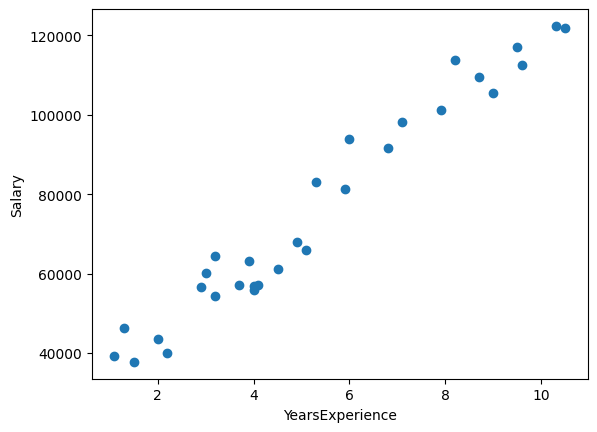

In [22]:
#Question 3: The scatter plot in the following image shows the relationship between the
#“YearsExperience” and “Salary” columns. What possible inferences can be drawn from the
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()
#The plot shows a positive correlation between the ‘YearsExperience” and “Salary” column.

<ipython-input-24-b5ea66779de6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

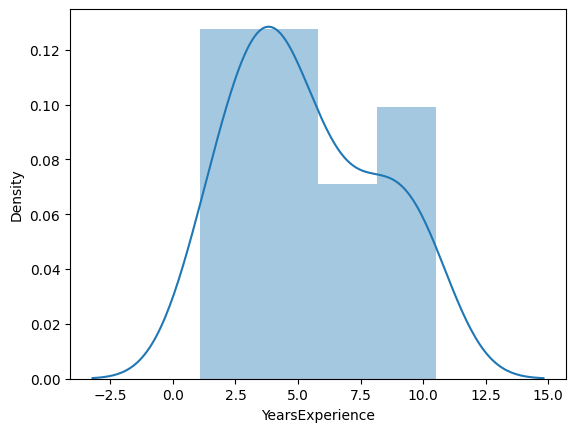

In [24]:
# Question 4: The distribution plot of the column “YearsExperience” is shown in the image below,
# what possible inferences can be drawn from the plot.
sns.distplot(df['YearsExperience'])


In [25]:
#Question 5 : What all inferences can be drawn from the table shown below:

df.describe()
#Answer : The range of the “YearsExperience” and “Salary” data is (10.5, 122391)

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


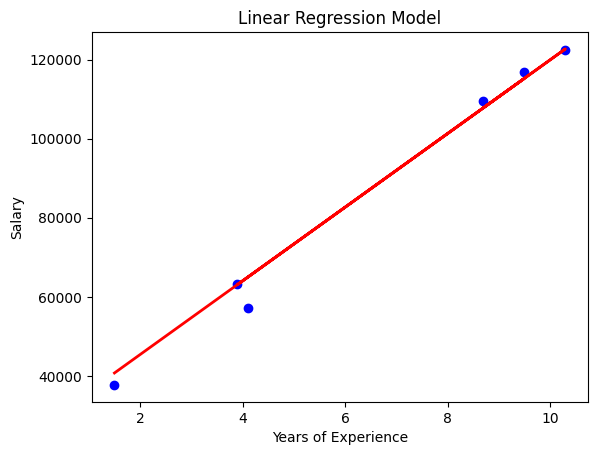

R2 Score: 0.988169515729126


In [28]:
# Question 6:
#To split the dataset into training and testing data, if we use the following
# code. X = data['YearsExperience']
# y = data['Salary']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
# random_state=0) What does it mean when we write the test size as 0.2?

# It means that 20% of the data will be used for testing and 80% will be used for training the model.



X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Model')
plt.show()

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


In [ ]:
# Question 7: In the above example code, we have taken the random state as 0, if we change the
# random state as 42, what does it mean for our training and testing data?
# Answer: The random state does not have any effect on the shape of the data. while its only play data selection


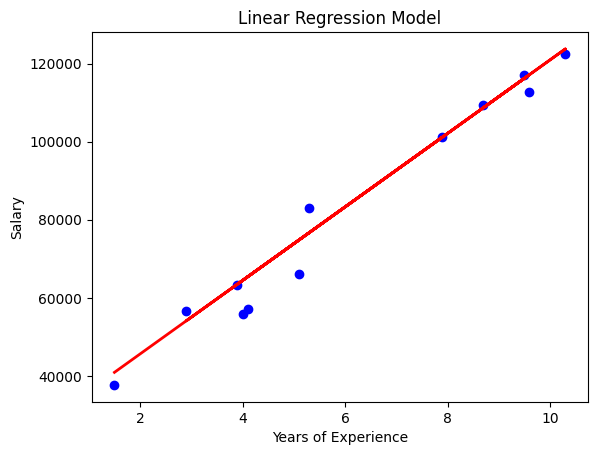

R2 Score: 0.9679117063698979


In [31]:
# Question 8: If the r2 score calculated in the above example is 0.98 , change the sample size of
# the training and testing set in the ratio 60:40, and build a linear regression model again.
# After plotting the best fit line on the test data, calculate the r2_score for the new model.



X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Model')
plt.show()

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
#Answer R2 Score: 0.9679117063698979

In [ ]:
# Question 9: If while fitting the model with training and testing data, you get the following error
# ValueError: Expected 2D array, got 1D array instead: What could be
# the issue with the data, and how can you solve it?


# Answer: Reshape the data to a two dimensional array

# Assuming 'X' is your feature data that caused the error:
X = X.reshape(-1, 1)  # Reshapes to a 2D array with one column



#The exercise after this contains questions that are based on  the housing dataset.

In [32]:
housingdf=pd.read_csv('/content/housing.csv')

In [33]:
housingdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [55]:
# House prices can be an ever changing trend, but it does change based on certain
#parameters. You are provided with housing data that has information on various houses
#and their prices. Use the data at hand to predict the prices of the house using linear
#regression in machine learning.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


housingdf = housingdf.drop('date', axis=1)  # drop this
# Assuming 'price' is the target variable
X = housingdf.drop('price', axis=1)  # Features
y = housingdf['price']  # Target variable

# Handle categorical features (if any) using one-hot encoding or other suitable methods
# ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)


Mean Squared Error: 45164817796.921906
Root Mean Squared Error: 212520.1585660097
R2 Score: 0.7012448715018391


In [35]:
#Question 10: How many houses have a waterfront?
len(housingdf[housingdf['waterfront']>0])
#Answer : 163

163

In [39]:
#Question 11: How many houses have 2 floors?
len(housingdf[housingdf['floors']==2])
#Answer : 8241

8241

In [40]:
#Question 12: How many houses built before 1960 have a waterfront?
len(housingdf[housingdf['yr_built']<1960])
#Answer : 7389

7389

In [44]:
#Question 13: What is the price of the most expensive house having more than 4 bathrooms?
housingdf[housingdf['bedrooms']>4]['price'].max()
#Answer : 7700000

7700000

<Axes: ylabel='price'>

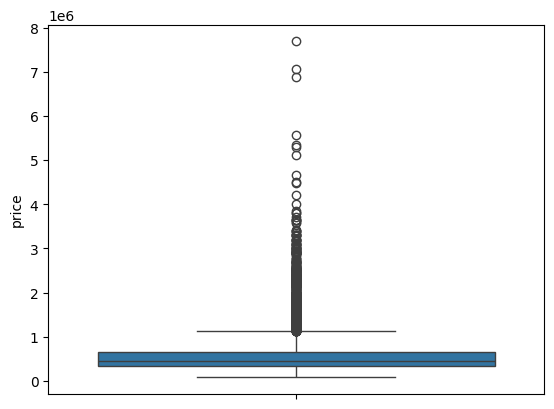

In [48]:
# Question 14: The image shown below shows the boxplot of the price column from the housing
# dataset. What inferences can you make from the plot?

sns.boxplot(housingdf['price'])
#Answer : The boxplot shows that there are outliers in the price column.

In [50]:
# Question 15: For instance, if the ‘price’ column consists of outliers, how can you make the data clean
# and remove the redundancies?
# a. Calculate the IQR range and drop the values outside the range.
# b. Calculate the p-value and remove the values less than 0.05.
# c. Calculate the correlation coefficient of the price column and remove the values less than
# the correlation coefficient.
# d. Calculate the Z-score of the price column and remove the values less than the z-score

# Answer : Calculate the IQR range and drop the values outside the range.
Q1 = housingdf['price'].quantile(0.25)
Q3 = housingdf['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
housingdf_cleaned = housingdf[(housingdf['price'] >= lower_bound) & (housingdf['price'] <= upper_bound)]
housingdf_cleaned

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Question 16: What are the various parameters that can be used to determine the dependent variables
# in the housing data to determine the price of the house?
# a. Correlation coefficients
# b. Z-score
# c. IQR Range
# d. Range of the Features

# Answer: a. Correlation coefficients


In [ ]:
# Question 17: If we get the r2 score as 0.38, what inferences can we make about the model and
# its efficiency?
# a. The model is 38% accurate, and shows poor efficiency.
# b. The model is showing 0.38% discrepancies in the outcomes.
# c. Low difference between observed and fitted values.
# d. High difference between observed and fitted values.

# Answer: d. High difference between observed and fitted values.


In [ ]:
# Question 18: If the metrics show that the p-value for the grade column is 0.092, what all inferences
# can we make about the grade column?
# a. Significant in presence of other variables.
# b. Highly significant in presence of other variables
# c. insignificance in presence of other variables
# d. None of the above

# Answer: c. insignificance in presence of other variables


In [ ]:
# Question 19: If the Variance Inflation Factor value for a feature is considerably higher than the
# other features, what can we say about that column/feature?
# a. High multicollinearity
# b. Low multicollinearity
# c. Both A and B
# d. None of the above

# Answer: a. High multicollinearity
